In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import FunctionTransformer



In [29]:
crashes = pd.read_csv('C:/Users/angie/Desktop/group_project/Chicago-Crashes/data/Traffic_Crashes_-_Crashes.csv', low_memory=False)
people = pd.read_csv('C:/Users/angie/Desktop/group_project/Chicago-Crashes/data/Traffic_Crashes_-_People.csv', low_memory = False)
#vehicles = pd.reimport pandas as pd

In [30]:
crashes.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [20]:
crashes.drop(['MOST_SEVERE_INJURY','INJURIES_TOTAL', 'INJURIES_FATAL','INJURIES_INCAPACITATING',
                      'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
                      'INJURIES_NO_INDICATION', 'CRASH_DATE', 'LATITUDE', 
                      'LONGITUDE','LOCATION'], axis=1, inplace = True)

In [21]:
df_list=[crashes, people]
for df in df_list:
    min_count =  int((20/100)*df.shape[0] + 1)
    df = df.dropna(axis=1, thresh=min_count, inplace=True)

In [22]:
people_mod = people.drop(['CITY', 'ZIPCODE','RD_NO'], axis =1)
crashes_mod = crashes.drop(['RD_NO','REPORT_TYPE', 'DATE_POLICE_NOTIFIED', 'STREET_NO', 
              'STREET_DIRECTION', 'STREET_NAME'], axis =1)

In [23]:
people_crashes_df = people_mod.merge(crashes_mod, on='CRASH_RECORD_ID', how='left')

In [31]:
people_crashes_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,STATE,SEX,AGE,DRIVERS_LICENSE_STATE,...,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,TARGET
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,IL,M,25.0,IL,...,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,1531.0,3.0,0.0,3,7,9,0
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,IL,M,37.0,IL,...,$500 OR LESS,IMPROPER OVERTAKING/PASSING,FAILING TO REDUCE SPEED TO AVOID CRASH,613.0,2.0,0.0,22,2,4,0
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,X,NaN,NaN,...,"OVER $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,821.0,2.0,0.0,5,1,11,0
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,X,NaN,NaN,...,"$501 - $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2023.0,2.0,0.0,8,1,11,0
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,X,NaN,NaN,...,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,223.0,2.0,0.0,10,1,11,0


In [24]:
people_crashes_df['TARGET'] = people_crashes_df['INJURY_CLASSIFICATION'].map({np.nan: 0,
                                                      'NO INDICATION OF INJURY': 0,
                                                      'NONINCAPACITATING INJURY': 1,
                                                      'REPORTED, NOT EVIDENT': 1,
                                                      'INCAPACITATING INJURY': 2,
                                                      'FATAL': 3})

In [44]:
(people_crashes_df.TARGET.value_counts(normalize = 'true'))*100

0    91.731445
1     7.308235
2     0.905459
3     0.054861
Name: TARGET, dtype: float64

In [60]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [2]:

from tabulate import tabulate

In [13]:
table = [['SEVERITY OF INJURY', 'PERCENT OF DATA'], [], ['No Injury', '  91.73%'], ['Non Incapacitating Injury', '  7.31%'], ['Incapacitating Injury', '  .91%'], ['Fatal', '  .05%']]
print(tabulate(table))

-------------------------  ---------------
SEVERITY OF INJURY         PERCENT OF DATA

No Injury                  91.73%
Non Incapacitating Injury  7.31%
Incapacitating Injury      .91%
Fatal                      .05%
-------------------------  ---------------


<AxesSubplot:ylabel='TARGET'>

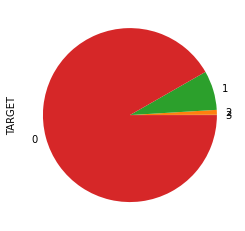

In [57]:
people_crashes_df.TARGET.value_counts(normalize = 'true').sort_values().plot(kind = 'pie')
#df.letters.value_counts().sort_values().plot(kind = 'barh')

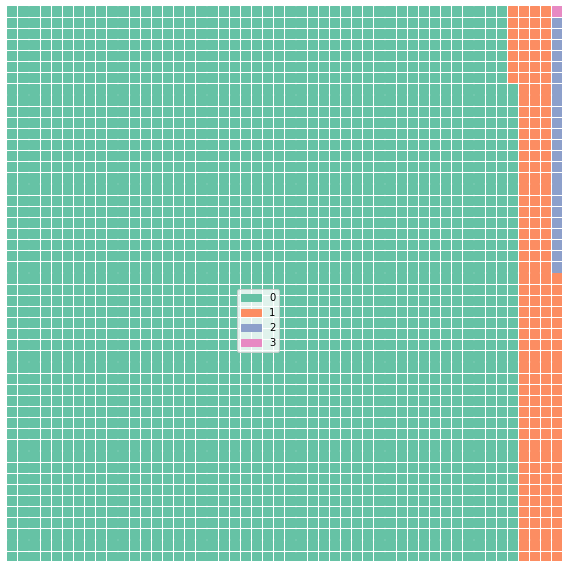

In [ ]:
people_crashes_df['CRASH_YEAR']=pd.to_datetime(people_crashes_df['CRASH_DATE']).dt.year

In [ ]:
# Drop nulls from BEAT_OF_OCCURRENCE
people_crashes_df.dropna(subset = ['BEAT_OF_OCCURRENCE'], inplace=True)

In [ ]:
# Drop ages < 0 and ages = 0 for DRIVER
people_crashes_df.loc[people_crashes_df.AGE < 0, 'AGE'] = np.nan
people_crashes_df.loc[(people_crashes_df.AGE == 0) & (people_crashes_df.PERSON_TYPE == 'DRIVER'), 'AGE'] = np.nan
people_crashes_df.dropna(subset = ['AGE'], inplace=True)

In [ ]:
# Drop POSTED_SPEED_LIMIT = 0 or not divisible by 5
people_crashes_df.loc[people_crashes_df.POSTED_SPEED_LIMIT == 0, 'POSTED_SPEED_LIMIT'] = np.nan
people_crashes_df.loc[(people_crashes_df.POSTED_SPEED_LIMIT % 5) != 0, 'POSTED_SPEED_LIMIT'] = np.nan
people_crashes_df.dropna(subset = ['POSTED_SPEED_LIMIT'], inplace=True)

In [ ]:
X = people_crashes_df[['PERSON_TYPE', 'SEX', 'SAFETY_EQUIPMENT', 'AGE', 'AIRBAG_DEPLOYED', 
                           'EJECTION', 'DRIVER_ACTION', 'SEAT_NO', 'LIGHTING_CONDITION', 'WEATHER_CONDITION', 
                           'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 
                           'BEAT_OF_OCCURRENCE', 'NUM_UNITS']]
y = people_crashes_df['TARGET']

In [ ]:
len(X), len(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
def seat_no_transformer(df):
    df['SEAT_NO'][df.PERSON_TYPE == 'DRIVER'] = 1
    df['SEAT_NO'].fillna(0, inplace=True)
    return df

In [ ]:
def to_float_transformer(df):
    '''
    Ensure all columns are float, not int.
    '''
    for col in [df.select_dtypes('int64').columns]:
        df[col] = df[col].astype('float64')
    return df

In [ ]:
def fill_categories(df):
    '''
    Fill null values with given value for 
    unknown values in that column.
    Drop all remaining nulls.
    '''
    df.fillna({'STATE':'XX', 
               'EJECTION': 'UNKNOWN',
               'DRIVER_ACTION': 'UNKNOWN',
               'DRIVER_VISION': 'UNKNOWN',
               'PHYSICAL_CONDITION': 'UNKNOWN',
               'SAFETY_EQUIPMENT': 'USAGE_UNKNOWN',
               'AIRBAG_DEPLOYED': 'DEPLOYMENT_UNKNOWN',
               'SEX': 'UNKNOWN',
               'INTERSECTION_RELATED_I': 'N',
               'HIT_AND_RUN_I': 'N',
               'BAC_RESULT': 'TEST NOT OFFERED'
              }, inplace=True)
    return df

In [ ]:
ohe_cols = list(X_train.select_dtypes('object').columns)
#ohe_cols.append('BEAT_OF_OCCURRENCE')

In [ ]:
# OneHotEncode the columns as part of cleaning
# to avoid needing to separate numerical and categorical
# columns later
ohe_col_trans = ColumnTransformer(transformers=
                                     [('ohe', OneHotEncoder(drop='first', sparse=False), 
                                       ohe_cols)],
                                 remainder='passthrough')

In [ ]:
# Apply all our cleaning functions, then finish with ohe
cleaning_pipeline = Pipeline(steps=[
    ('seat_no', FunctionTransformer(seat_no_transformer)),
#     ('age', FunctionTransformer(age_transformer)),
#    ('beat', FunctionTransformer(beat_transformer)),
#     ('speed', FunctionTransformer(speed_limit_transformer)),
#    ('license', FunctionTransformer(dl_class_transformer)),
    ('fill_cat', FunctionTransformer(fill_categories)),
    ('float', FunctionTransformer(to_float_transformer)),
    ('col_trains', ohe_col_trans)
])



**--------------SMOTE, LogisticRegression, Default params------------------------**

In [ ]:
X_train_cleaned = cleaning_pipeline.fit_transform(X_train)

In [ ]:
len(X_train_cleaned), len(y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train_cleaned, y_train)

In [ ]:
model_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, max_iter = 100))
])

In [ ]:
model_pipe.fit(X_train, y_train)

In [ ]:
model_pipe.score(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model_pipe.steps[1][1], X_train, y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_train, y_pred, normalize = 'true')
print(cm)
plot_confusion_matrix(model_pipe, X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_validate

def print_cv_scores(pipe):
    
    # we pass in pipe to cross validate along with a feature list.
    results = cross_validate(pipe, X_train, 
                                   y_train, 
                                   return_train_score=True)
    
    print(results['train_score'])
    print(results['train_score'].mean())
    print('##############')
    print(results['test_score'])
    print(results['test_score'].mean())
    
print_cv_scores(model_pipe)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision_recall_fscore_support(y_train, y_pred, average='macro')



-----SMOTE, LogisticRegression, Solver: 'lbfgs', # of Iterations: 100, Weights: 'balanced'------

In [ ]:
X_train_cleaned = cleaning_pipeline.fit_transform(X_train)

In [ ]:
len(X_train_cleaned), len(y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train_cleaned, y_train)

In [ ]:
model_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, solver = 'lbfgs', max_iter = 100, class_weight = 'balanced'))
])

In [ ]:
model_pipe.fit(X_train, y_train)

In [ ]:
model_pipe.score(X_train, y_train)

In [ ]:
precision_recall_fscore_support(y_train, y_pred, average='macro')

In [ ]:
# from sklearn.model_selection import cross_validate

# def print_cv_scores(pipe):
    
#     # we pass in pipe to cross validate along with a feature list.
#     results = cross_validate(pipe, X_train, 
#                                    y_train, 
#                                    return_train_score=True)
    
#     print(results['train_score'])
#     print(results['train_score'].mean())
#     print('##############')
#     print(results['test_score'])
#     print(results['test_score'].mean())
    
# print_cv_scores(model_pipe)



-----SMOTE, LogisticRegression, Solver: 'liblinear', # of Iterations: 100, Weights: 'balanced'------

In [ ]:
X_train_cleaned = cleaning_pipeline.fit_transform(X_train)

In [ ]:
len(X_train_cleaned), len(y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_cleaned, y_train)

In [ ]:
model_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, solver = 'liblinear', max_iter = 100, class_weight = 'balanced'))
])

In [ ]:
model_pipe.fit(X_res, y_res)

In [ ]:
model_pipe.score(X_res, y_res)

In [ ]:
precision_recall_fscore_support(y_res, y_pred, average='macro')

**----- XGBOOST, default params------**

In [47]:
from xgboost import XGBClassifier

In [48]:
X_train_cleaned = cleaning_pipeline.fit_transform(X_train)

<ipython-input-41-fb83f2cf173c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEAT_NO'][df.PERSON_TYPE == 'DRIVER'] = 1
C:\Users\angie\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
C:\Users\angie\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return su

In [49]:
len(X_train_cleaned), len(y_train)

(627054, 627054)

In [50]:
X_train.isna().sum()

PERSON_TYPE                0
SEX                        0
SAFETY_EQUIPMENT           0
AGE                        0
AIRBAG_DEPLOYED            0
EJECTION                   0
DRIVER_ACTION              0
SEAT_NO                    0
LIGHTING_CONDITION         0
WEATHER_CONDITION          0
FIRST_CRASH_TYPE           0
TRAFFICWAY_TYPE            0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
BEAT_OF_OCCURRENCE         0
NUM_UNITS                  0
dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_cleaned, y_train)

In [52]:
model_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42, n_jobs = -1))
])

In [ ]:
model_pipe.fit(X_res, y_res)

In [ ]:
model_pipe.score(X_res, y_res)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model_pipe.steps[1][1], X_res, y_res)

In [ ]:
precision_recall_fscore_support(y_res, y_pred, average='macro')

In [ ]:
print(model_pipe.steps[1][1].feature_importances_)

In [ ]:
feature_name = cleaning_pipeline.steps[-1][1].get_feature_names()
importance = [0.00254953, 0., 0.00233605, 0.00184723, 0.00097822, 0.00190925, 0.00063667, 0., 0.00207959, 0.00255143, 0., 0.00347863, 0.00226279, 0.019971, 0.00513911, 0., 0.00307888, 0.00187971, 0.00106023, 0.00102159, 0., 0.001242, 0.00136372, 0.00363245, 0.00165718, 0.0008518, 0., 0.0026852, 0., 0.00122229, 0.00111545, 0.00087373, 0.00911209, 0.0021856, 0.00044858, 0.00141463, 0.00124821, 0.00159017, 0., 0., 0., 0.00283378, 0.00171399, 0., 0.00199945, 0., 0.00118223, 0.00668535, 0., 0.00109466, 0.00401093, 0.00388916, 0.00272809, 0.01884322, 0.0045156, 0.00133088, 0., 0.00217315, 0.00772509, 0.0006892, 0.00263684, 0.01616743, 0.00812377, 0.00607146, 0., 0.00184517, 0.01411981, 0.00183418, 0.01307631, 0.00462931, 0.00542847, 0.01481777, 0.00219632, 0.00650142, 0.00336755, 0.06709845, 0.01570165, 0.0232122, 0.018059, 0.00679315, 0.00429122, 0.00489835, 0.00014759, 0.00165096, 0.00513983, 0.0291157, 0., 0.00671592, 0.00109376, 0.00371024, 0.00182787, 0.0051496, 0.01043787, 0.00372879, 0., 0.00559065, 0.01502675, 0.00993086, 0.00306601, 0.00369758, 0.02638649, 0., 0.00930436, 0.00256558, 0.00698451, 0.00583299, 0.0006391, 0.00265303,
 0.00595531, 0.00678822, 0.00479762, 0.00296563, 0.00327525, 0.00279237,
 0.00119998, 0.00966071, 0.00869574, 0.01835277, 0.01679247, 0.00308825,
 0.00769471, 0.00518557, 0.01508538, 0.0037915,  0.0202597,  0.02124231,
 0.00208727, 0.00147029, 0.00210141, 0.0062456,  0.00509456, 0.00592563,
 0.00197763, 0.00795799, 0.00341921, 0.00718072, 0.01116631, 0.00868733,
 0.01067301, 0.00586468, 0.00808448, 0.00534105, 0.01213205, 0.00776362,
 0.01058323, 0.00266318, 0.00400647, 0.00865966, 0.00993486, 0.00619971,
 0.00205991, 0.02401683, 0.00155812, 0.00779086, 0.00091193, 0.00621508,
 0.00085267, 0.00121016, 0.00165691, 0.00142914, 0.00274774, 0.02355196,
 0.00613796, 0.00533831, 0.00463595, 0.00795607, 0.00843228, 0.01086943,
 0.00825049, 0.01543103]
# summarize feature importance
for i,v in enumerate(importance):
    if v > 0.0001:
        print('Feature: %s, Score: %.5f' % (feature_name[i],v))
        
len(importance)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_res, y_pred, normalize = 'true')
print(cm)
plot_confusion_matrix(model_pipe, X_res, y_res)

**----- ADASYN, DecisionTree, sampling_strategy = 'minority', n_neighbors = 5------(didn't actually use)**

In [ ]:
X_train_cleaned = cleaning_pipeline.fit_transform(X_train)

In [ ]:
len(X_train_cleaned), len(y_train)

In [ ]:
ada = ADASYN(sampling_strategy = 'minority', random_state = 42, n_neighbors = 5)

In [ ]:
X_res, y_res = ada.fit_resample(X_train_cleaned, y_train)

In [ ]:
model_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('dtc', DecisionTreeClassifier(random_state=42, max_depth= 6, class_weight = 'balanced'))
])

In [ ]:
model_pipe.fit(X_res, y_res)

In [ ]:
model_pipe.score(X_res, y_res)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model_pipe.steps[1][1], X_res, y_res)

In [ ]:
precision_recall_fscore_support(y_res, y_pred, average='macro')

**----- SMOTE, XGRegressor, default params------**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
X_train_cleaned = cleaning_pipeline.fit_transform(X_train)

In [ ]:
len(X_train_cleaned), len(y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_cleaned, y_train)

In [ ]:
model_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('xgb', XGBRegressor())
])

In [ ]:
model_pipe.fit(X_res, y_res)

In [ ]:
model_pipe.score(X_res, y_res)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model_pipe.steps[1][1], X_res, y_res)

In [ ]:
precision_recall_fscore_support(y_res, y_pred, average='macro')

In [1]:
X.head()

NameError: name 'X' is not defined